# TP à rendre 1 quantification et échantillonage
Dans ce TP, nous aimerions transformer une image pseudo analogique en image numérique. 
L'image à coordonnées (x,y) réelles et valeurs d'amplitude f(x,y) réelles, devra être numérisée en:
- transformant d'abord les coordonnées en entiers 
- transformant ensuite les amplitudes en entiers

L'image pseudo analogique est contenue dans le fichier de données à loader.

# 1- Importantion des librairies necessaires au travail

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Lecture des fichiers d'amplitude et coordonnées

In [25]:
outfile1 = 'lines1.npy'
outfile2 = 'Cols1.npy'
outfile3 = 'amplitude1.npy'
lines=np.load(outfile1)
cols=np.load(outfile2)
amplitude=np.load(outfile3)

# Echantillonage

In [26]:
# utiliser un saut pour l'échantillonage
step=5
# réaliser l'échantillonage
lines=lines[::step]
cols=cols[::step]
#*1000 pour obtenir des valeurs entières et parceque toutes les valeurs sont entre 0 et 0.999 
lines=lines*1000
cols=cols*1000
#.astype(int) parceque le array est de type float
lines=lines.astype(int)
cols=cols.astype(int)
#On garde uniquement l'amplitude des lignes echantillonnées
print(amplitude.shape)
amplitude=amplitude[lines]
print(amplitude.shape)
#On garde uniquement l'amplitude des colonnes echantillonnées
amplitude=amplitude[:,cols]
amplitude.shape

(1000, 1000)
(200, 1000)


(200, 200)

# Quantification

In [27]:
nBits=4
# calculer le nombre de niveaux de gris
L= pow(2,nBits)
#réaliser la quantification
#L=>1 règle de trois a(x)=x*(L-1)
resultat=np.round(amplitude*(L-1))

# Afficher l'image résultante

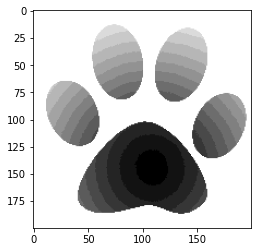

In [28]:
plt.imshow(resultat,cmap='gray')

# Sauvegarder l'image résultante

In [6]:
plt.imsave("résultat.png", resultat, cmap='gray')

# Lecture et affichage d'une autre image 


In [29]:
# lecture de l'image en niveau de gris
image = cv2.imread('toAdd.bmp',0)

In [30]:
# afficher avec opencv
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Réaliser les operations sur l'image

Addition des deux images

Les dimensions de la premiere image (200, 200) sont differentes de la seconde (1000, 1000) . On réduit donc cette seconde


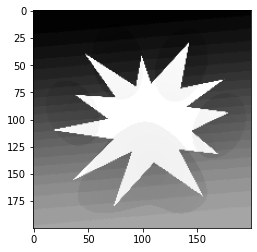

In [9]:
# additionner image et resultat
# si les deux images ne sont pas de même taille, 
# il faudra les redimensionner
# analyser les paramètres de redimensionnement

print("Les dimensions de la premiere image",resultat.shape,"sont differentes de la seconde",image.shape,". On réduit donc cette seconde")
im = cv2.resize(image,dsize=resultat.shape)
imageN=im+resultat
plt.imshow(imageN,cmap='gray')

Negatif de l'image

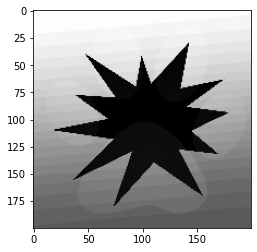

In [10]:
# soustraire de 255 de chaque pixel 
imageN=255-imageN
# afficher l'image résultante
plt.imshow(imageN,cmap='gray')

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h

In [11]:
# bonne chance